## Guía de Trabajo: Análisis de Datos con Pandas, Matplotlib y Seaborn

### Introducción:
En esta guía, aprenderemos a utilizar las bibliotecas de Python Pandas, Matplotlib y Seaborn para el análisis exploratorio de datos. Utilizaremos datos artificiales para comprender cómo cargar, limpiar, visualizar y analizar datos utilizando estas poderosas herramientas.

### 1. Instalación de Bibliotecas: Normalmente estas bibliotecas ya se encuetran disponibles en tu entorno
Asegúrate de tener instaladas las siguientes bibliotecas:
```bash
pip install pandas matplotlib seaborn
```

### 2. Importación de Bibliotecas:
```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
```


In [5]:
#use a ! to run a shell command in a jupyter notebook

! pip install pandas
! pip install matplotlib
! pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 1: Introducción a Series
**Objetivo:** Aprender a crear y manipular Series en pandas.


1. **Crear una Serie a partir de una lista de Python:**

In [3]:
#A series is a one-dimensional array-like object containing a sequence of values and an associated array of data labels, called its index.
#The difference between a series and a list is that a series can have an index, meaning that it can be labeled, whereas a list cannot.
data = [10, 20, 30, 40, 50]
series = pd.Series(data)
print(series)

0    10
1    20
2    30
3    40
4    50
dtype: int64


2. **Asignar etiquetas (índices) personalizadas a una Serie:**

In [4]:
#We can also specify the index of the series
#The index can be a list of strings or numbers
#The index must be the same length as the data
#If no index is specified, the index will be a range of numbers starting at 0
#The index will work like a dictionary key, so we can use it to access the data
#The differece between dictornary and series is that the series is ordered
labels = ['a', 'b', 'c', 'd', 'e']
series = pd.Series(data, index=labels)
print(series)

a    10
b    20
c    30
d    40
e    50
dtype: int64


3. **Acceder a elementos de una Serie:**

In [6]:
#If we want to access the data using the index, we can use the index as a key
#We can also use the index as a key to change the data
#The number index will still work
print(series['b'])
print(series[1])

20
20


C:\Users\diana\AppData\Local\Temp\ipykernel_16300\2829660639.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(series[1])


4. **Operaciones básicas en Series:**

In [8]:
#Basic operations can be done on a series

#Multiply by scalar value
print(series * 2)

#Multiply by another series
print(series * series)

#dot product
print("dot product: ", series.dot(series))

#Find the mean of a series
print("Mean:", series.mean())

#Describe the series with all the basic statistics
print(series.describe())

a     20
b     40
c     60
d     80
e    100
dtype: int64
a     100
b     400
c     900
d    1600
e    2500
dtype: int64
dot product:  5500
Mean: 30.0
count     5.000000
mean     30.000000
std      15.811388
min      10.000000
25%      20.000000
50%      30.000000
75%      40.000000
max      50.000000
dtype: float64


In [13]:
#Series can also have string data
data = ["pedro","pedro","pedro", "marcos", "ricardo", "Teresa", "Camila","Camila","Camila","Camila"]
series = pd.Series(data)
print(series)

0      pedro
1      pedro
2      pedro
3     marcos
4    ricardo
5     Teresa
6     Camila
7     Camila
8     Camila
9     Camila
dtype: object


In [ ]:
#When describing a series with string data, we get different statistics
print(series.describe())

#Mixed data can also be used in a series
#The series will have the data type of the most general data type
#In this case, the data type is object
#The describe method will return the statistics of the most general data type
mixedData = [10, 20, 30, 40, 50, "pedro","pedro","pedro", "marcos", "ricardo", "Teresa", "Camila","Camila","Camila","Camila"]
series = pd.Series(mixedData)
print(series)
print(series.describe())


count         10
unique         5
top       Camila
freq           4
dtype: object
0          10
1          20
2          30
3          40
4          50
5       pedro
6       pedro
7       pedro
8      marcos
9     ricardo
10     Teresa
11     Camila
12     Camila
13     Camila
14     Camila
dtype: object
count         15
unique        10
top       Camila
freq           4
dtype: object



### Ejercicio 2: Introducción a DataFrames
**Objetivo:** Aprender a crear y manipular DataFrames en pandas.


1. **Crear un DataFrame a partir de un diccionario:**

In [18]:
data = {
    'Nombre': ['Ana', 'Juan', 'Pedro', 'María'],
    'Edad': [23, 34, 45, 29],
    'Ciudad': ['Madrid', 'Barcelona', 'Sevilla', 'Valencia']
}
df = pd.DataFrame(data, index=['a', 'b', 'c', 'd'])
print(df)

  Nombre  Edad     Ciudad
a    Ana    23     Madrid
b   Juan    34  Barcelona
c  Pedro    45    Sevilla
d  María    29   Valencia


2. **Acceder a columnas y filas de un DataFrame:**

In [38]:
#In dataframes, we can access the columns using the column name
print(df['Nombre'])

#We can access multiple columns by passing a list of column names
print(df[['Nombre', 'Ciudad']])

#We can also access the columns using loc and iloc
#The difference between loc and iloc is that loc uses the index name, while iloc uses the index number
print(df.loc[:,'Nombre'])
print(df.iloc[:,0])

a      Ana
b     Juan
c    Pedro
d    María
Name: Nombre, dtype: object
  Nombre     Ciudad
a    Ana     Madrid
b   Juan  Barcelona
c  Pedro    Sevilla
d  María   Valencia
a      Ana
b     Juan
c    Pedro
d    María
Name: Nombre, dtype: object
a      Ana
b     Juan
c    Pedro
d    María
Name: Nombre, dtype: object


In [39]:
#To access specific rows you can use the loc and iloc methods
print(df.loc['a'])


Nombre         Ana
Edad            23
Ciudad      Madrid
Salario2      3000
Name: a, dtype: object


In [40]:
#We can also access multiple rows by passing a list or range of index names
#Both use the same syntax start:end, but loc uses the index name, while iloc uses the index number
print(df.loc['a':'c'])
print(df.iloc[0:3])

  Nombre  Edad     Ciudad  Salario2
a    Ana    23     Madrid      3000
b   Juan    34  Barcelona      4000
c  Pedro    45    Sevilla      3500
  Nombre  Edad     Ciudad  Salario2
a    Ana    23     Madrid      3000
b   Juan    34  Barcelona      4000
c  Pedro    45    Sevilla      3500


In [41]:
#To access specific rows and columns, you can use loc and iloc with two parameters
#The first parameter is the rows, and the second parameter is the columns
print(df.loc['a':'c', 'Nombre':'Ciudad'])

  Nombre  Edad     Ciudad
a    Ana    23     Madrid
b   Juan    34  Barcelona
c  Pedro    45    Sevilla


In [43]:
#To access specific rows you can use the df[] syntax
#The first parameter is the rows, and the second parameter is the columns
print(df[0:3])

  Nombre  Edad     Ciudad  Salario2
a    Ana    23     Madrid      3000
b   Juan    34  Barcelona      4000
c  Pedro    45    Sevilla      3500


In [24]:
#The data in a column can be accessed using the column name
#The data can be described
s = df["Ciudad"]
s.describe()

count          4
unique         4
top       Madrid
freq           1
Name: Ciudad, dtype: object

In [25]:
#We can also describe the entire dataframe
df.describe()

,Edad
count,4.000000
mean,32.750000
std,9.322911
min,23.000000
25%,27.500000
50%,31.500000
75%,36.750000
max,45.000000


3. **Añadir y eliminar columnas:**

In [27]:
#To add a new column to the dataframe, we can use the column name as a key
df['Salario'] = [3000, 4000, 3500, 4500]
print(df)

#We can also add a new column by using the assign method
df = df.assign(Salario2=[3000, 4000, 3500, 4500])
print(df)

#To remove a column from the dataframe, we can use the del keyword
del df['Salario']
print(df)


  Nombre  Edad     Ciudad  Salario2  Salario
a    Ana    23     Madrid      3000     3000
b   Juan    34  Barcelona      4000     4000
c  Pedro    45    Sevilla      3500     3500
d  María    29   Valencia      4500     4500
  Nombre  Edad     Ciudad  Salario2  Salario
a    Ana    23     Madrid      3000     3000
b   Juan    34  Barcelona      4000     4000
c  Pedro    45    Sevilla      3500     3500
d  María    29   Valencia      4500     4500
  Nombre  Edad     Ciudad  Salario2
a    Ana    23     Madrid      3000
b   Juan    34  Barcelona      4000
c  Pedro    45    Sevilla      3500
d  María    29   Valencia      4500


4. **Filtrar datos en un DataFrame:**


In [29]:
#Filtering dataframes
#We can filter the data in a dataframe using a boolean mask
#The mask is a boolean series that has the same length as the dataframe
#The mask is used to filter the data in the dataframe
mask = df['Edad'] > 30
#The mask will return a boolean series
print(mask)

#The mask can be passed to the dataframe to filter the data
print(df[mask])

#The mask step can be skipped
print(df[df['Edad'] > 30])

a    False
b     True
c     True
d    False
Name: Edad, dtype: bool
  Nombre  Edad     Ciudad  Salario2
b   Juan    34  Barcelona      4000
c  Pedro    45    Sevilla      3500
  Nombre  Edad     Ciudad  Salario2
b   Juan    34  Barcelona      4000
c  Pedro    45    Sevilla      3500


### Ejercicio 3: Carga de Datos desde Archivos
**Objetivo:** Aprender a cargar y guardar datos usando pandas.

1. **Leer datos desde un archivo CSV:**
    ```python
    df = pd.read_csv('ruta/al/archivo.csv')
    print(df.head())
    ```

2. **Guardar datos en un archivo CSV:**
    ```python
    df.to_csv('ruta/al/archivo_guardado.csv', index=False)
    ```




In [ ]:
#to load and save dataframes from and to a file, we can use the to_csv and read_csv methods

df = pd.read_csv('data.csv')
print(df)

df.to_csv('data.csv', index=False)

          Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driv


### Generación de Datos Artificiales




In [52]:
import pandas as pd
import numpy as np

# Configurar la semilla para reproducibilidad
np.random.seed(42)

# Generar datos
#select a number of samples
num_samples = 1000
#generate random data for the age, hours worked per week and job category
#age is a random number between 20 and 65
age = np.random.randint(20, 65, size=num_samples)  # Variable numérica
#hours worked per week is a random number between 20 and 60
hours_worked_per_week = np.random.randint(20, 60, size=num_samples)  # Variable discreta
#job category is a random choice between Oficina, Campo and Remoto
job_category = np.random.choice(['Oficina', 'Campo', 'Remoto'], size=num_samples)  # Variable categórica

# Crear DataFrame
data = {
    'Edad': age,
    'HorasTrabajadasPorSemana': hours_worked_per_week,
    'CategoriaTrabajo': job_category
}
df = pd.DataFrame(data)

df.head(10)

,Edad,HorasTrabajadasPorSemana,CategoriaTrabajo
0,58,33,Oficina
1,48,45,Remoto
2,34,23,Remoto
3,62,44,Campo
4,27,44,Campo
5,40,37,Campo
6,58,59,Campo
7,38,27,Oficina
8,42,58,Oficina
9,30,59,Campo


In [54]:
# Introducir valores faltantes al azar en todas las variables
missing_percentage = 0.03
num_missing = int(num_samples * missing_percentage)

# Crear un índice aleatorio para los valores faltantes
missing_indices = np.random.choice(df.index, num_missing, replace=False)
print(missing_indices)

# Aplicar valores faltantes en todas las variables
for col in df.columns:
    df.loc[missing_indices[:num_missing//3], col] = np.nan

# Introducir valores faltantes en una sola variable en 1% de los registros
missing_percentage_single_var = 0.01
num_missing_single_var = int(num_samples * missing_percentage_single_var)
single_var_missing_indices = np.random.choice(df.index, num_missing_single_var, replace=False)
df.loc[single_var_missing_indices, 'Edad'] = np.nan

# Mostrar los primeros registros del DataFrame
df.head(10)

[751 655 199 441 741 984 847 311 913 306 791 417 576 300 696 997 376 993
 811 206 888   2 881 407 550 831 352 203 353 322]


,Edad,HorasTrabajadasPorSemana,CategoriaTrabajo
0,58.0,33.0,Oficina
1,48.0,45.0,Remoto
2,34.0,23.0,Remoto
3,62.0,44.0,Campo
4,NaN,44.0,Campo
5,40.0,37.0,Campo
6,58.0,59.0,Campo
7,38.0,27.0,Oficina
8,42.0,58.0,Oficina
9,30.0,59.0,Campo


In [56]:
df.tail(10)

,Edad,HorasTrabajadasPorSemana,CategoriaTrabajo
990,30.0,34.0,Campo
991,NaN,23.0,Campo
992,56.0,40.0,Remoto
993,33.0,32.0,Campo
994,49.0,41.0,Oficina
995,54.0,38.0,Remoto
996,40.0,53.0,Campo
997,56.0,33.0,Remoto
998,24.0,23.0,Remoto
999,38.0,46.0,Campo


In [69]:
dfex = pd.read_csv('data.csv')
dfex.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [70]:
#To check if there are any missing values in the dataframe, we can use the isnull method
#The isnull method will return a boolean dataframe with the same shape as the original dataframe
#The value True indicates that the value is missing
#sum method can be used to count the number of missing values in each column
dfex.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [72]:
#dfex.dropna(inplace=True) will remove all rows with missing values
dfex.dropna(inplace=True)
print(dfex)

          Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driv

### Ejercicio 4: Limpieza de Datos

**Objetivo:** Aprender a manejar datos faltantes y realizar limpieza básica de datos.

1. **Identificar datos faltantes:**
    ```python
    print(df.isnull().sum())
    ```

2. **Rellenar datos faltantes:**
    ```python
    df.fillna(0, inplace=True)
    print(df)
    ```

3. **Eliminar filas/columnas con datos faltantes:**
    ```python
    df.dropna(inplace=True)
    print(df)
    ```



In [ ]:
#To find the missing values in a df, we can use the isnull method
print(df.isnull().sum())

Edad                        40
HorasTrabajadasPorSemana    20
CategoriaTrabajo            20
dtype: int64


In [75]:
#to fill the missing values in a df, we can use the fillna method
#The fillna method can be used to fill the missing values with a specific value
#fillna(value, inplace=True) will fill the missing values with the specified value
#inplace=True will modify the original dataframe
#inplace=False will return a new dataframe with the missing values filled
df.fillna(0, inplace=True)
df.tail(10)

,Edad,HorasTrabajadasPorSemana,CategoriaTrabajo
990,30.0,34.0,Campo
991,0.0,23.0,Campo
992,56.0,40.0,Remoto
993,33.0,32.0,Campo
994,49.0,41.0,Oficina
995,54.0,38.0,Remoto
996,40.0,53.0,Campo
997,56.0,33.0,Remoto
998,24.0,23.0,Remoto
999,38.0,46.0,Campo


### Ejercicio 5: Agrupamiento y Resumen de Datos

**Objetivo:** Aprender a agrupar datos y obtener resúmenes estadísticos.

1. **Agrupar datos por una columna:**
    ```python
    grouped = df.groupby('CategoriaTrabajo')
    print(grouped.mean())
    ```

2. **Obtener estadísticas descriptivas por grupo:**
    ```python
    print(grouped.describe())
    ```



In [77]:
#The grouby method can be used to group the data in a dataframe
#The groupby method will return a groupby object
#The groupby object can be used to apply aggregate functions to the groups
#The aggregate functions can be applied to the groups using the mean, sum, count, etc. methods
#The aggregate functions will return a new dataframe with the aggregated data

grouped = df.groupby('CategoriaTrabajo')
print(grouped.mean())

                       Edad  HorasTrabajadasPorSemana
CategoriaTrabajo                                     
0                  0.000000                  0.000000
Campo             40.420000                 40.457143
Oficina           41.220497                 39.251553
Remoto            41.762987                 39.961039


In [ ]:
#To get described statistics for each group, we can use the describe method
grouped.describe()

Edad                                                      \
                  count       mean        std  min   25%   50%    75%   max   
CategoriaTrabajo                                                              
0                  20.0   0.000000   0.000000  0.0   0.0   0.0   0.00   0.0   
Campo             350.0  40.420000  14.950660  0.0  29.0  41.0  53.75  64.0   
Oficina           322.0  41.220497  13.129756  0.0  31.0  43.0  51.00  64.0   
Remoto            308.0  41.762987  14.175689  0.0  31.0  43.0  54.00  64.0   

                 HorasTrabajadasPorSemana                                    \
                                    count       mean        std   min   25%   
CategoriaTrabajo                                                              
0                                    20.0   0.000000   0.000000   0.0   0.0   
Campo                               350.0  40.457143  11.489731  20.0  31.0   
Oficina                             322.0  39.251553  11.559493  20.0  29.0   
Remoto                              308.0  39.961039  11.613977  20.0  30.0   

                                     
                   50%    75%   max  
CategoriaTrabajo                     
0                  0.0   0.00   0.0  
Campo             41.0  50.75  59.0  
Oficina           39.0  49.00  59.0  
Remoto            40.0  51.00  59.0


### Ejercicio 6: Visualización de Datos

**Objetivo:** Aprender a visualizar datos usando pandas y matplotlib.

1. **Visualización básica de un DataFrame:**
    ```python
    import matplotlib.pyplot as plt

    df['Edad'].plot(kind='hist', title='Distribución de Edades')
    plt.show()
    ```

2. **Gráficos de barras y de líneas:**
    ```python
    df.plot(kind='bar', x='CategoriaTrabajo', y='HorasTrabajadasPorSemana', title='Horas Trabajadas por Categoría de Trabajo')
    plt.show()

    df['HorasTrabajadasPorSemana'].plot(kind='line', title='Horas Trabajadas por Semana')
    plt.show()
    ```

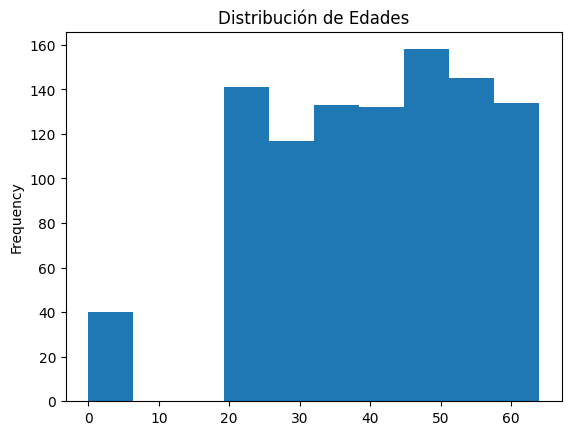

In [64]:
import matplotlib.pyplot as plt

#matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy
#pyplot is a collection of command style functions that make matplotlib work like MATLAB
#The plot method can be used to plot the data in a dataframe
#The plot method will return a matplotlib axes object
#The axes object can be used to customize the plot
#The show method can be used to display the plot
df['Edad'].plot(kind='hist', title='Distribución de Edades')
plt.show()

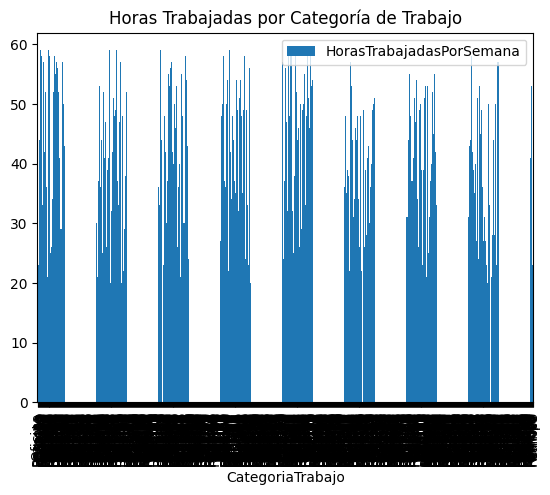

In [86]:
#The plot method can be used to plot the data in a dataframe
#kind can be used to specify the type of plot
#x can be used to specify the x-axis
#y can be used to specify the y-axis
#title can be used to specify the title of the plot
df.plot(kind='bar', x='CategoriaTrabajo', y='HorasTrabajadasPorSemana', title='Horas Trabajadas por Categoría de Trabajo')
plt.show()

###3. Cargar datos: Si trabajamos en colab, también será necesario dar permisos para acceder al google drive

#### paso 1: dar permisos a colab para acceder a nuestro Drive
#### definimos la ruta hasta nuestro drive en la variable `root` para indicar donde se encuentran nuestros archivos
```python
from google.colab import drive
drive.mount('/content/drive')


root = "/content/drive/My Drive/"

```


In [3]:
from google.colab import drive
drive.mount('/content/drive')

root = "/content/drive/My Drive/"

Mounted at /content/drive


### Paso 2: complementar la ruta de nuestro archivo y leerlo usando pandas

primero definimos la ruta a nuestro archivo, debe ser una carpeta en nuestro Drive
```python
archivo = root + "cursopython/artificial.csv"
```
Luego usamos pandas para leer el archivo con los datos
```python
datos= pd.read_csv(archivo)

```
Finalmente mostramos la cabecera de los datos para confirmar que los datos si corresponden.
```python
datos.head()
```

### **Ejercicio** : crear la carpeta `data` en google drive, cargar los datos compartidos en la clase anterior y hacer el proceso para cada uno de ellos mostrando la cabecera de los datos
**nota** : hacer el proceso (ejercicio) en un colab diferente a este

In [90]:
# archivo = root + "cursopython/artificial.csv"
datos= pd.read_csv("artificial.csv")
datos.head()

,ID,Age,Income,Children,Education,Marital_Status,Purchase_Amount
0,1,34,56.8,1,Master's,Married,150.23
1,2,23,45.2,0,Bachelor's,Single,78.45
2,3,45,123.6,3,PhD,Married,320.87
3,4,36,76.9,2,Master's,Divorced,189.34
4,5,29,60.0,0,Bachelor's,Single,54.78


### 4. Exploración de Datos:
```python
# Ver las primeras filas del DataFrame
print(datos.head())

# Obtener información sobre el DataFrame
print(datos.info())

# Resumen estadístico de los datos numéricos
print(datos.describe())

# Conteo de valores únicos en una columna
print(datos['Nombre columna'].value_counts())
```


In [91]:
#df.info() will return a summary of the dataframe
#The summary will include the number of non-null values, the data type of each column, and the memory usage
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               100 non-null    int64  
 1   Age              100 non-null    int64  
 2   Income           100 non-null    float64
 3   Children         100 non-null    int64  
 4   Education        100 non-null    object 
 5   Marital_Status   100 non-null    object 
 6   Purchase_Amount  100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB
None


In [92]:
#df.head() will return the first 5 rows of the dataframe by default
print(datos.head())

   ID  Age  Income  Children   Education Marital_Status  Purchase_Amount
0   1   34    56.8         1    Master's        Married           150.23
1   2   23    45.2         0  Bachelor's         Single            78.45
2   3   45   123.6         3         PhD        Married           320.87
3   4   36    76.9         2    Master's       Divorced           189.34
4   5   29    60.0         0  Bachelor's         Single            54.78


In [ ]:
#column.value_counts() will return the count of unique values in a column
print(datos['Marital_Status'].value_counts())

Marital_Status
Married     62
Single      29
Divorced     9
Name: count, dtype: int64



### 5. Visualización de Datos con Matplotlib:
```python
# Histograma de la columna 'A'
plt.hist(datos['A'], bins=20)
plt.title('Histograma de A')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()
```


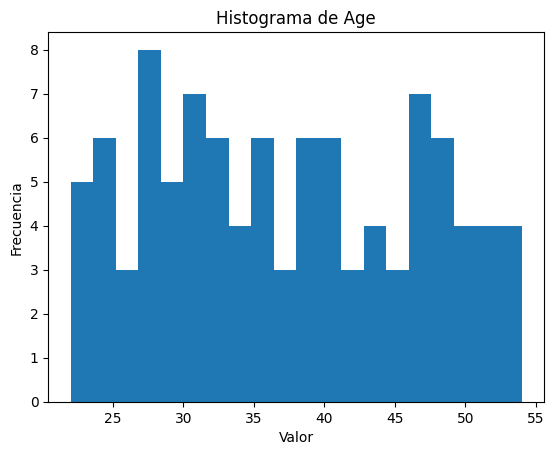

In [96]:
#Other way to plot inside of using df.plot(kind='hist') is using plt.hist()
# Histograma de la columna 'Age'
#hist(data, bins), data is the data to be plotted, bins is the number of bins (intervals) to divide the data
plt.hist(datos['Age'], bins=20)
plt.title('Histograma de Age')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


### 6. Visualización de Datos con Seaborn:
```python
# Gráfico de dispersión de 'A' vs 'B' con Seaborn
sns.scatterplot(x='A', y='B', data=datos)
plt.title('Gráfico de Dispersión de A vs B')
plt.show()

# Boxplot de 'C' vs 'B' con Seaborn
sns.boxplot(x='C', y='B', data=datos)
plt.title('Boxplot de C vs B')
plt.show()
```


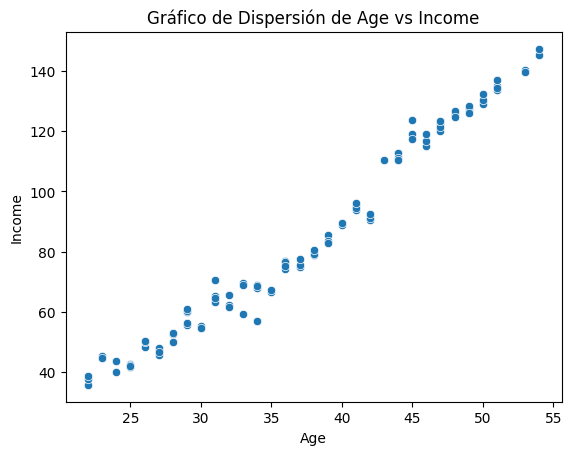

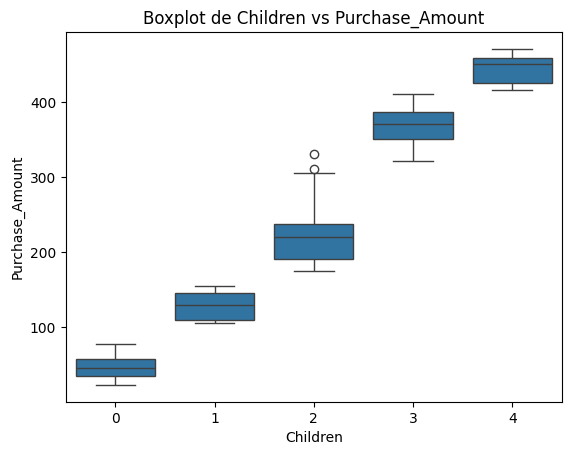

In [ ]:
#The other way to plot is using seaborn
#seaborn is a Python data visualization library based on matplotlib
#It provides a high-level interface for drawing attractive and informative statistical graphics
# Gráfico de dispersión de 'Age' vs 'Income' con Seaborn
sns.scatterplot(x='Age', y='Income', data=datos)
#plt and sns can be used together to customize the plot
plt.title('Gráfico de Dispersión de Age vs Income')
plt.show()

# Boxplot de 'Children' vs 'Purchase_Amount' con Seaborn
sns.boxplot(x='Children', y='Purchase_Amount', data=datos)
plt.title('Boxplot de Children vs Purchase_Amount')
plt.show()


### 7. Limpieza de Datos:
```python
# Eliminar filas con valores NaN
datos_limpio = datos.dropna()

# Eliminar duplicados
datos_limpio = datos.drop_duplicates()

# Corregir nombres de columnas
datos.rename(columns={'A': 'Columna_A', 'B': 'Columna_B'}, inplace=True)
```


In [ ]:
#To eliminate rows with missing values, we can use the dropna method
cleanedData = datos.dropna()

#To eliminate duplicates, we can use the drop_duplicates method
cleanedData = datos.drop_duplicates()

#To rename the columns in a dataframe, we can use the rename method
#The rename method takes a dictionary as an argument
#The keys of the dictionary are the old column names, and the values are the new column names
cleanedData = datos.rename(columns={'Marital_Status': 'MaritalStatus', 'Income': 'IncomeUSD'})


### 8. Análisis Adicional:
```python
# Correlación entre columnas numéricas
correlacion = datos.corr()
print(correlacion)

# Mapa de calor de correlación con Seaborn
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()
```


                      Age    Income  Children  Purchase_Amount
Age              1.000000  0.987053  0.968709         0.986530
Income           0.987053  1.000000  0.957517         0.991933
Children         0.968709  0.957517  1.000000         0.972207
Purchase_Amount  0.986530  0.991933  0.972207         1.000000


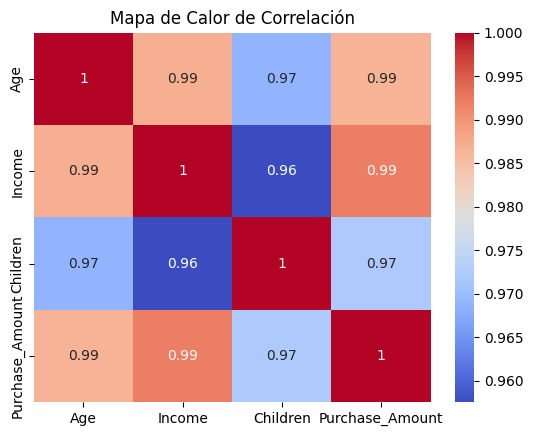

In [100]:
# Correlación entre columnas numéricas
columnas = ['Age',  'Income' , 'Children',   'Purchase_Amount']
#corr() will return the correlation between the columns
#The correlation is a value between -1 and 1
#The correlation can be used to measure the relationship between two variables
#Specific columns can be selected by passing a list of column names
correlacion = datos[columnas].corr()
print(correlacion)

# Mapa de calor de correlación con Seaborn
#seaborn can be used to make a heatmap of the correlation
#The heatmap will show the correlation between the columns
#annot=True will show the correlation values on the heatmap
#The cmap parameter can be used to specify the color map
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

## 9. Ejemplos

### Ejemplo jugadores
Supongamos que queremos almacenar información sobre jugadores de futbol guardando el nombre, la posición y el pais de origen. Lo hacemos con un diccionario de la siguiente forma:

In [ ]:
#crear diccionario
jugadores = \
{
        'Nombre': ['Casillas', 'Ramos', 'Ronaldo', 'Messi', 'Neymar', 'Roberto Carlos', 'Falcao', 'James',
                 'David Ospina', 'Valderrama', 'Jorge Bermudez'],
        'Posicion': ['Arquero', 'Defensa', 'Delantero', 'Delantero','Delantero', 'Defensa', 'Delantero',
                        'Medio campo', 'Arquero', 'Medio campo', 'Defensa'],
        'Pais': ['España', 'España', 'Portugal', 'Argentina', 'Brasil', 'Brasil',
                 'Colombia', 'Colombia', 'Colombia', 'Colombia', 'Colombia']
    }

#crear data frame
#You can used pd.DataFrame() to create a dataframe
#The first argument is the data, which can be a dictionary, list, or series
#The columns argument can be used to specify the column names
#The index argument can be used to specify the index names
jugadores_df = pd.DataFrame(jugadores
    , columns=['Nombre', 'Posicion', 'Pais'], #index = range(1,12)
)

jugadores_df

,Nombre,Posicion,Pais
0,Casillas,Arquero,España
1,Ramos,Defensa,España
2,Ronaldo,Delantero,Portugal
3,Messi,Delantero,Argentina
4,Neymar,Delantero,Brasil
5,Roberto Carlos,Defensa,Brasil
6,Falcao,Delantero,Colombia
7,James,Medio campo,Colombia
8,David Ospina,Arquero,Colombia
9,Valderrama,Medio campo,Colombia


También podemos cargar los datos desde un archivo, normalmente archivos **csv**

In [123]:
#mis archivos de datos se encuentran almacenados en la carpeta cursopython de mi drive, en su caso reemplazar por la carpeta que corresponda

# archivo = root + "cursopython/arqueros.csv"
df= pd.read_csv("arqueros.csv")
df.head()

,Nombre,Posicion,Pais
0,Casillas,Arquero,España
1,Ramos,Defensa,España
2,Ronaldo,Delantero,Portugal
3,Messi,Delantero,Argentina
4,Neymar,Delantero,Brasil


In [124]:
#ahora queremos agregar otro jugador:
# df[11:] = ['Buffon', 'Arquero', 'Italia'] would do the same thing
df.loc[11] = ['Buffon', 'Arquero', 'Italia']
df

,Nombre,Posicion,Pais
0,Casillas,Arquero,España
1,Ramos,Defensa,España
2,Ronaldo,Delantero,Portugal
3,Messi,Delantero,Argentina
4,Neymar,Delantero,Brasil
5,Roberto Carlos,Defensa,Brasil
6,Falcao,Delantero,Colombia
7,James,Medio campo,Colombia
8,David Ospina,Arquero,Colombia
9,Valderrama,Medio campo,Colombia


In [125]:
#agregar nueva columna
df['Estado'] = \
['activo','activo','activo','activo','activo','retirado','activo','activo','activo','retirado','retirado','retirado']
df

,Nombre,Posicion,Pais,Estado
0,Casillas,Arquero,España,activo
1,Ramos,Defensa,España,activo
2,Ronaldo,Delantero,Portugal,activo
3,Messi,Delantero,Argentina,activo
4,Neymar,Delantero,Brasil,activo
5,Roberto Carlos,Defensa,Brasil,retirado
6,Falcao,Delantero,Colombia,activo
7,James,Medio campo,Colombia,activo
8,David Ospina,Arquero,Colombia,activo
9,Valderrama,Medio campo,Colombia,retirado


In [126]:
#filtar datos
df[df['Estado']=='retirado']

,Nombre,Posicion,Pais,Estado
5,Roberto Carlos,Defensa,Brasil,retirado
9,Valderrama,Medio campo,Colombia,retirado
10,Jorge Bermudez,Defensa,Colombia,retirado
11,Buffon,Arquero,Italia,retirado


In [127]:
df[df['Posicion']=='Arquero']

,Nombre,Posicion,Pais,Estado
0,Casillas,Arquero,España,activo
8,David Ospina,Arquero,Colombia,activo
11,Buffon,Arquero,Italia,retirado


<Axes: xlabel='Pais'>

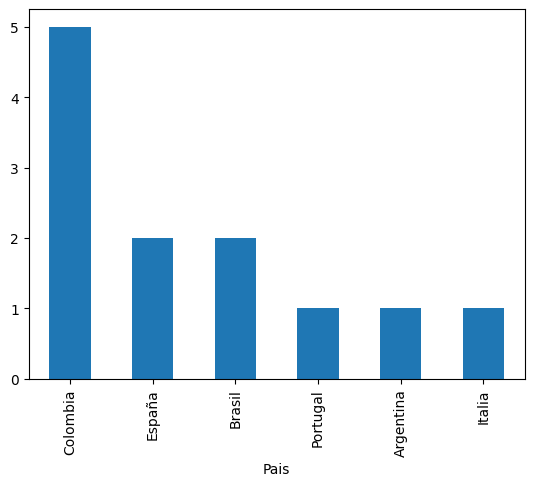

In [128]:
df['Pais'].value_counts().plot.bar()

<Axes: xlabel='Pais'>

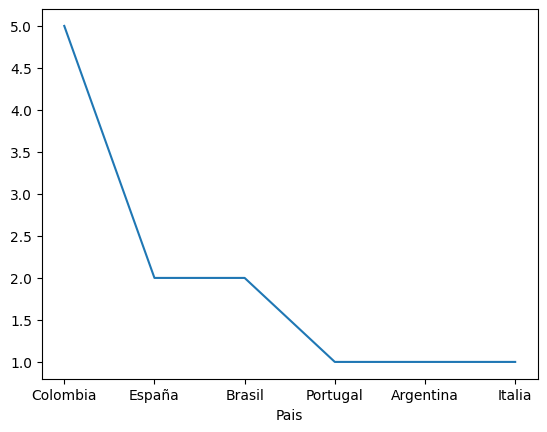

In [129]:
df['Pais'].value_counts().plot()

#### Manipulación de Datos con Pandas

**Descripción**:
Trabajar con un DataFrame de Pandas para realizar operaciones de selección, filtrado y agregación de datos.

**Instrucciones**:
1. Crear un DataFrame con datos ficticios de ventas (ID, Producto, Cantidad, Precio, Fecha).
2. Filtrar las ventas de un producto específico.
3. Calcular el total de ventas por producto.
4. Crear una nueva columna con el valor total de cada venta (Cantidad * Precio).

**Solución**:

```python
import pandas as pd
from datetime import datetime

# Crear un DataFrame
data = {
    'ID': range(1, 11),
    'Producto': ['A', 'B', 'A', 'C', 'B', 'A', 'D', 'B', 'C', 'D'],
    'Cantidad': [10, 5, 8, 3, 7, 9, 2, 6, 4, 1],
    'Precio': [100, 200, 150, 300, 200, 150, 400, 200, 300, 400],
    'Fecha': [datetime(2024, 5, i+1) for i in range(10)]
}
df = pd.DataFrame(data)

# Filtrar ventas del producto 'A'
producto_a = df[df['Producto'] == 'A']
print("Ventas del Producto A:")
print(producto_a)

# Calcular el total de ventas por producto
total_ventas = df.groupby('Producto')['Cantidad'].sum()
print("\nTotal de Ventas por Producto:")
print(total_ventas)

# Crear una nueva columna con el valor total de cada venta
df['Total'] = df['Cantidad'] * df['Precio']
print("\nDataFrame con Columna de Total de Venta:")
print(df)
```



In [131]:
from datetime import datetime

In [133]:
data = {
    'ID': range(1, 11),
    'Producto': ['A', 'B', 'A', 'C', 'B', 'A', 'D', 'B', 'C', 'D'],
    'Cantidad': [10, 5, 8, 3, 7, 9, 2, 6, 4, 1],
    'Precio': [100, 200, 150, 300, 200, 150, 400, 200, 300, 400],
    'Fecha': [datetime(2024, 5, i+1) for i in range(10)]
}
df = pd.DataFrame(data)
df


,ID,Producto,Cantidad,Precio,Fecha
0,1,A,10,100,2024-05-01
1,2,B,5,200,2024-05-02
2,3,A,8,150,2024-05-03
3,4,C,3,300,2024-05-04
4,5,B,7,200,2024-05-05
5,6,A,9,150,2024-05-06
6,7,D,2,400,2024-05-07
7,8,B,6,200,2024-05-08
8,9,C,4,300,2024-05-09
9,10,D,1,400,2024-05-10


In [ ]:
#Filter by a specific product
print(df[df['Producto']=='A'])

   ID Producto  Cantidad  Precio      Fecha
0   1        A        10     100 2024-05-01
2   3        A         8     150 2024-05-03
5   6        A         9     150 2024-05-06


In [ ]:
#Calculate the total sales per product
grouped = df.groupby('Producto')
print(grouped['Cantidad'].sum())

#To skip the groupby step, we can use the groupby method with the aggregate function
#print(df.groupby('Producto')['Cantidad'].sum())

Producto
A    27
B    18
C     7
D     3
Name: Cantidad, dtype: int64


In [140]:
#Create new column to add total sales product * price
df['Total'] = df['Cantidad'] * df['Precio']
df

,ID,Producto,Cantidad,Precio,Fecha,Total
0,1,A,10,100,2024-05-01,1000
1,2,B,5,200,2024-05-02,1000
2,3,A,8,150,2024-05-03,1200
3,4,C,3,300,2024-05-04,900
4,5,B,7,200,2024-05-05,1400
5,6,A,9,150,2024-05-06,1350
6,7,D,2,400,2024-05-07,800
7,8,B,6,200,2024-05-08,1200
8,9,C,4,300,2024-05-09,1200
9,10,D,1,400,2024-05-10,400


#### Visualización de Datos con Matplotlib

**Descripción**:
Visualizar datos utilizando gráficos de línea y de barras.

**Instrucciones**:
1. Crear una serie temporal de datos de ventas mensuales para un año.
2. Graficar las ventas mensuales en un gráfico de línea.
3. Graficar un gráfico de barras mostrando las ventas por trimestre.

**Solución**:

```python
import matplotlib.pyplot as plt

# Datos de ventas mensuales
months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
ventas_mensuales = [1200, 1500, 1100, 1800, 1600, 1700, 1900, 1750, 1400, 1300, 2000, 2100]

# Gráfico de línea
plt.figure(figsize=(10, 5))
plt.plot(months, ventas_mensuales, marker='o', linestyle='-', color='b')
plt.title('Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

# Ventas trimestrales
trimestres = ['Q1', 'Q2', 'Q3', 'Q4']
ventas_trimestrales = [sum(ventas_mensuales[i:i+3]) for i in range(0, 12, 3)]

# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(trimestres, ventas_trimestrales, color='g')
plt.title('Ventas Trimestrales')
plt.xlabel('Trimestre')
plt.ylabel('Ventas')
plt.show()
```



#### Análisis Exploratorio de Datos con Seaborn

**Descripción**:
Usar Seaborn para realizar un análisis exploratorio de datos (EDA).

**Instrucciones**:
1. Cargar el conjunto de datos 'tips' de Seaborn.
2. Crear un gráfico de dispersión mostrando la relación entre la propina y el total de la cuenta.
3. Crear un gráfico de caja (boxplot) para comparar la distribución de las propinas entre diferentes días de la semana.

**Solución**:

```python
import seaborn as sns

# Cargar datos
tips = sns.load_dataset('tips')

# Gráfico de dispersión
plt.figure(figsize=(8, 5))
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title('Relación entre Total de la Cuenta y Propina')
plt.xlabel('Total de la Cuenta')
plt.ylabel('Propina')
plt.show()

# Gráfico de caja
plt.figure(figsize=(8, 5))
sns.boxplot(x='day', y='tip', data=tips)
plt.title('Distribución de Propinas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Propina')
plt.show()
```

Utilizar Seaborn para ilustrar cómo generar diferentes tipos de gráficos: un histograma, un gráfico de barras y un mapa de calor de correlación.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el entorno para que los gráficos se muestren en el notebook
%matplotlib inline

# Crear datos artificiales
np.random.seed(42)
data = {
    'numerical_col1': np.random.randn(100),
    'numerical_col2': np.random.rand(100) * 100,
    'numerical_col3': np.random.randint(1, 100, 100),
    'categorical_col': np.random.choice(['Category A', 'Category B', 'Category C'], 100)
}

# Crear DataFrame
df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame
df.head()


,numerical_col1,numerical_col2,numerical_col3,categorical_col
0,0.496714,41.741100,98,Category B
1,-0.138264,22.210781,21,Category C
2,0.647689,11.986537,30,Category B
3,1.523030,33.761517,97,Category C
4,-0.234153,94.290970,28,Category A


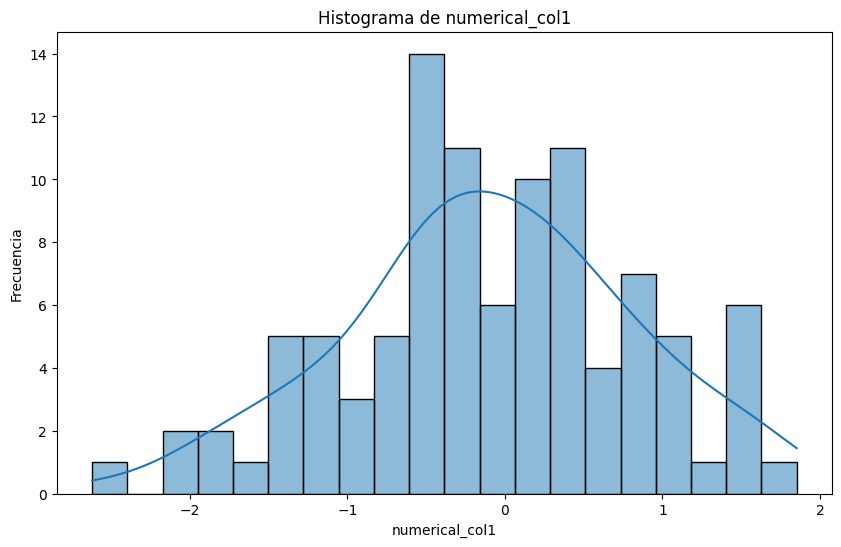

In [ ]:
# Histograma de numerical_col1
plt.figure(figsize=(10, 6))
sns.histplot(df['numerical_col1'], bins=20, kde=True)
plt.title('Histograma de numerical_col1')
plt.xlabel('numerical_col1')
plt.ylabel('Frecuencia')
plt.show()


C:\Users\16079220\AppData\Local\Temp\ipykernel_28740\3939034930.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='categorical_col', y='numerical_col2', data=df, ci=None)


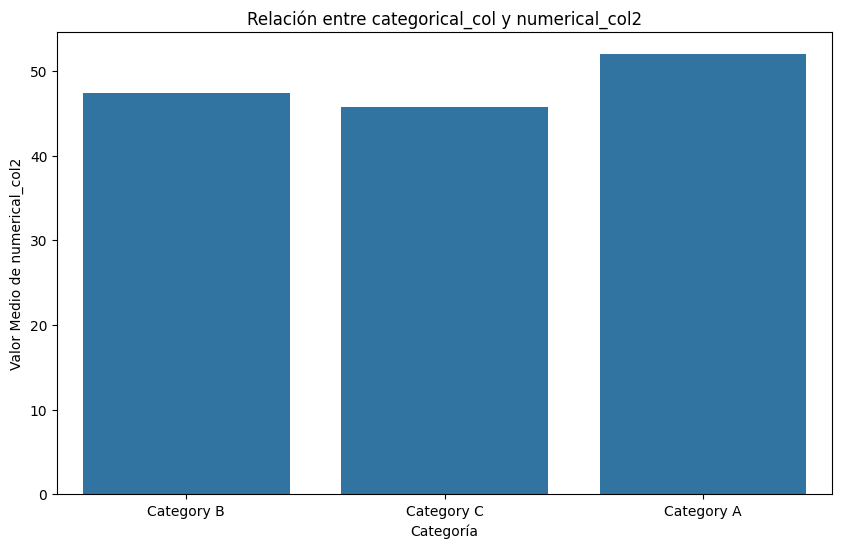

In [ ]:
# Gráfico de barras entre categorical_col y numerical_col2
plt.figure(figsize=(10, 6))
sns.barplot(x='categorical_col', y='numerical_col2', data=df, ci=None)
plt.title('Relación entre categorical_col y numerical_col2')
plt.xlabel('Categoría')
plt.ylabel('Valor Medio de numerical_col2')
plt.show()


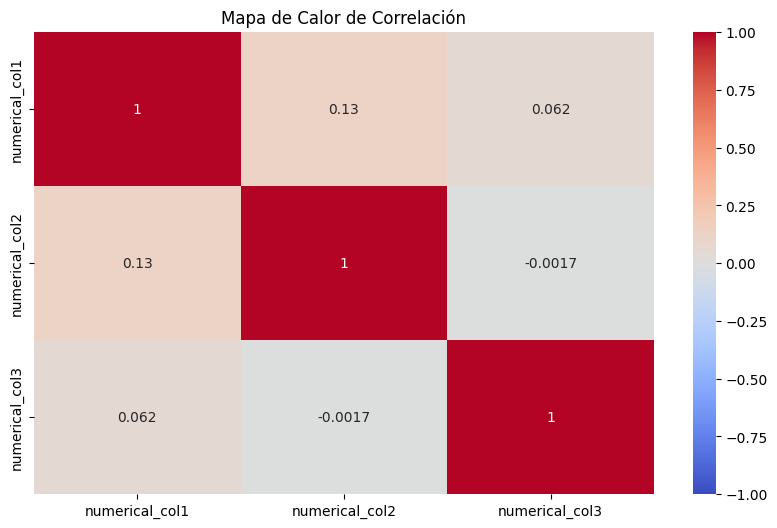

In [ ]:
# Calcular la correlación entre las columnas numéricas
corr = df[['numerical_col1', 'numerical_col2', 'numerical_col3']].corr()

# Mapa de calor de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación')
plt.show()
